In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import binary_erosion, binary_dilation
from scipy.ndimage.morphology import binary_fill_holes, morphological_gradient
from scipy.ndimage.morphology import distance_transform_edt
import numpy as np
import matplotlib.pyplot as plt

In [12]:
im = rgb2gray(imread('imagenes/giraffe.png'))
thres = threshold_otsu(im)
im = (im > thres).astype(np.uint8)

eroded = binary_erosion(im, structure=np.ones((2, 2)), iterations=20)[20:, 20:]
eroded = 1 - eroded

dilated = binary_dilation(eroded, structure=np.ones((11, 11)))
edges = 1 - morphological_gradient(im, size=3)
boundary = np.clip(dilated.astype(int) - eroded.astype(int), 0, 1)
dt = distance_transform_edt(np.logical_not(boundary))

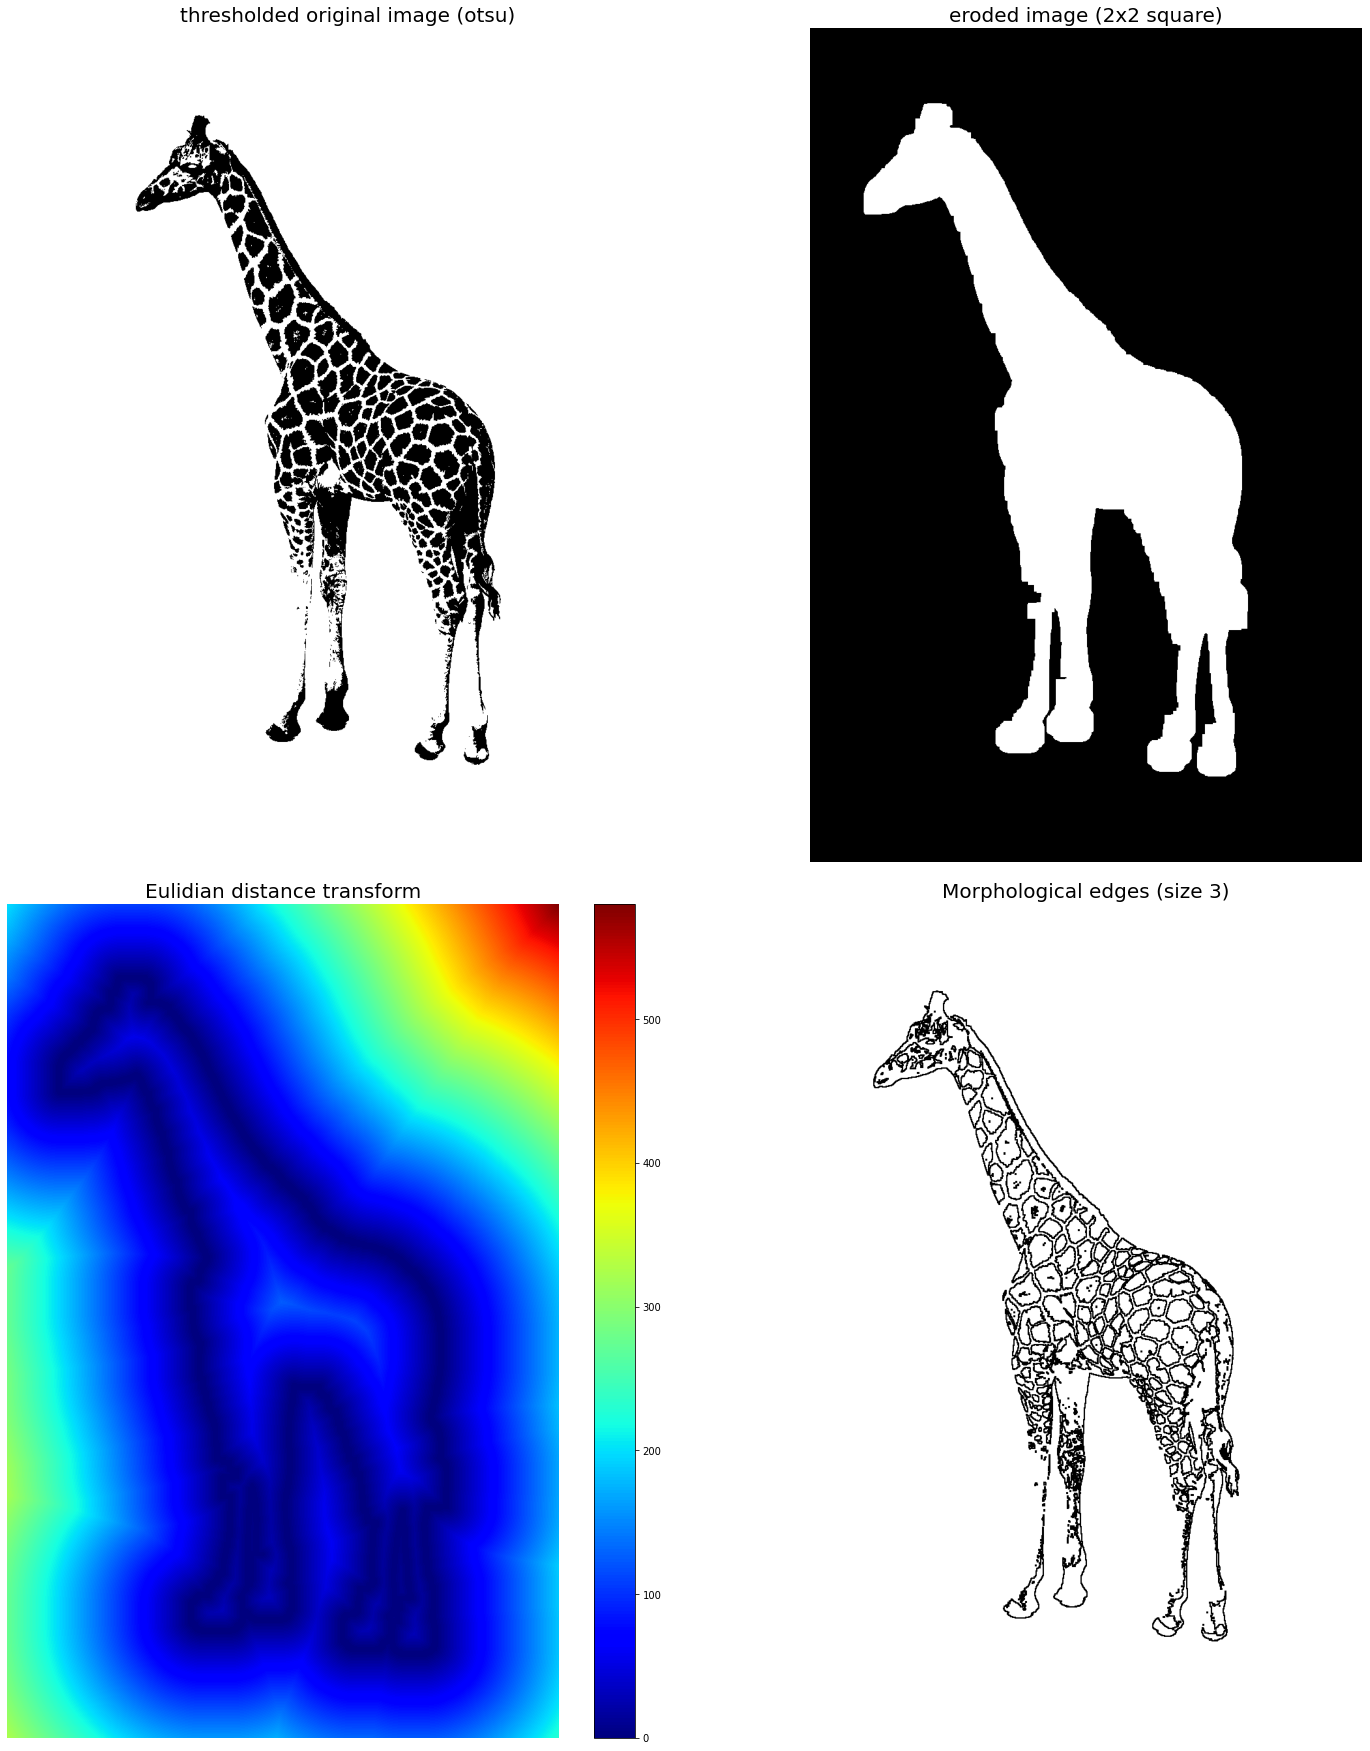

In [13]:
plt.figure(figsize=(20, 25))
plt.gray()
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05)

plt.subplot(221), plt.imshow(im), plt.axis('off')
plt.title('thresholded original image (otsu)', size=20)

plt.subplot(222), plt.imshow(eroded), plt.axis('off')
plt.title('eroded image (2x2 square)', size=20)

plt.subplot(223), plt.imshow(dt, cmap="jet"), plt.axis('off')
plt.title('Eulidian distance transform', size=20), plt.colorbar()

plt.subplot(224), plt.imshow(edges), plt.axis('off')
plt.title('Morphological edges (size 3)', size=20)

plt.show()